In [1]:
# !mim install mmpose

In [2]:
from mmengine.config import Config
from mmengine.runner import Runner

from mmpose.apis import MMPoseInferencer, init_model

In [3]:
from mmpose.datasets import CocoDataset

In [6]:
# model = init_model(
#     config=config_path,
#     checkpoint=checkpoint_path,
#     device='cuda:0'
# )
# config_path='model_config/human_detector.py'
config_path = './src/modules/pose_estimator_2d/config/hrnet.py'
checkpoint_path = \
    'https://download.openmmlab.com/mmpose/v1' \
        '/body_2d_keypoint/topdown_heatmap/coco'\
            '/td-hm_hrnet-w32_8xb64-210e_coco-256x192-81c58e40_20220909.pth'
# checkpoint_path='./mmdet_model/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth',
# pretrained_path="https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth"
# checkpoint_path="human_detector_wd/epoch_1.pth"
pretrained_path = checkpoint_path
data_root_path='/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/'
device='cuda:0'
working_directory='./pose_estimator_2d_wd'
# log_level='CRITICAL'
log_level = 'INFO'

config = Config.fromfile(config_path)

# config.train_cfg['_delete_'] = True
config.train_cfg['by_epoch'] = False
config.train_cfg['max_iters'] = 1000
config.train_cfg['val_interval'] = 100
config.train_dataloader['dataset']['data_root'] = data_root_path
config.train_dataloader['dataset']['ann_file'] = \
    'annotations/person_keypoints_train.json'
# config.train_dataloader['dataset']['bbox_file'] = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_train.json'
config.train_dataloader['dataset']['data_prefix']['img'] = 'images/train'

config.val_dataloader['dataset']['data_root'] = data_root_path
config.val_dataloader['dataset']['ann_file'] = \
    '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_val.json'
config.val_dataloader['dataset']['bbox_file'] = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/person_detection_results/ground_truth_val.json'
config.val_dataloader['dataset']['data_prefix']['img'] = 'images/val'

config.test_dataloader['dataset']['data_root'] = data_root_path
config.test_dataloader['dataset']['ann_file'] = \
    '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_test.json'
config.test_dataloader['dataset']['bbox_file'] = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/person_detection_results/ground_truth_test.json'
config.test_dataloader['dataset']['data_prefix']['img'] = 'images/test'

# config.data_root = data_root_path
config.load_from = pretrained_path
config.work_dir = working_directory
config.log_level = log_level
config.val_evaluator.ann_file = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_val.json'
config.test_evaluator.ann_file = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_test.json'


config.dump('test_config.py')
runner = Runner.from_cfg(config)

07/20 14:41:17 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1566408677
    GPU 0: NVIDIA TITAN Xp
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.7, V11.7.99
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-ge

In [5]:
runner.train()

/opt/conda/lib/python3.10/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/coco.py" does not exist. A matched config file "/opt/conda/lib/python3.10/site-packages/mmpose/.mim/configs/_base_/datasets/coco.py" will be used instead.
  warnings.warn(


loading annotations into memory...
Done (t=0.76s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
07/19 12:17:16 - mmengine - INFO - load model from: https://download.openmmlab.com/mmpose/pretrain_models/hrnet_w32-36af842e.pth
07/19 12:17:16 - mmengine - INFO - Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/pretrain_models/hrnet_w32-36af842e.pth
07/19 12:17:16 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: head.0.0.0.conv1.weight, head.0.0.0.bn1.weight, head.0.0.0.bn1.bias, head.0.0.0.bn1.running_mean, head.0.0.0.bn1.running_var, head.0.0.0.bn1.num_batches_tracked, head.0.0.0.conv2.weight, head.0.0.0.bn2.weight, head.0.0.0.bn2.bias, head.0.0.0.bn2.running_mean, head.0.0.0.bn2.running_var, head.0.0.0.bn2.num_batches_tracked, head.0.0.0.co

TopdownPoseEstimator(
  (data_preprocessor): PoseDataPreprocessor()
  (backbone): HRNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm

In [6]:
# model = init_detector(
#     config_path,
#     checkpoint_path,
#     device=self.device
# )

# build the inferencer with model config name
# inferencer = MMPoseInferencer(config_path)

# build the inferencer with model config path and checkpoint path/URL
# inferencer = MMPoseInferencer(
#     pose2d=config_path,
#     pose2d_weights=checkpoint_path
# )

inferencer = MMPoseInferencer(
    # pose2d='human',
    pose2d=config_path,
    # pose2d_weights=checkpoint_path,
    pose2d_weights='pose_estimator_2d_wd/best_coco_AP_epoch_0.pth',
    det_model='model_config/human_detector.py',
    det_weights='human_detector_wd/epoch_1.pth',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by local backend from path: pose_estimator_2d_wd/best_coco_AP_epoch_0.pth
07/19 12:34:46 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
07/19 12:34:46 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
Loads checkpoint by local backend from path: human_detector_wd/epoch_1.pth
07/19 12:34:47 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


In [7]:
# result_generator = inferencer(img_path, pred_out_dir='predictions')
# result = next(result_generator)

# img_path = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/images/train/000000000002.jpg'
img_path = '/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/images/val/000000003126.jpg'
result_generator = inferencer(img_path, vis_out_dir='vis_results')
result = next(result_generator)

Output()

In [8]:
import pandas as pd

keypoints = pd.DataFrame(result['predictions'][0][0]['keypoints'], columns=['x', 'y'])

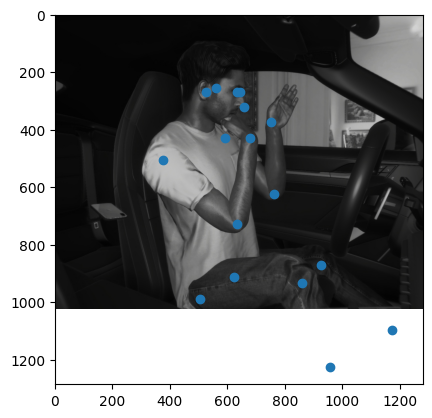

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.scatter(keypoints['x'], keypoints['y'])
plt.show()

In [10]:
# import json

# with open('/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/annotations/person_keypoints_train.json') as f:
#     data = json.loads(f.readline())


# bbox = []
# for i in range(len(data['images'])):
#     bbox.append({
#         'image_id': data['images'][i]['id'],
#         'category_id': data['annotations'][i]['category_id'],
#         'bbox': data['annotations'][i]['bbox'],
#         'score': 1
#     })
#     # if (i + 1) % 5 == 0:
#         # break

# with open('/root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/person_detection_results/ground_truth_train.json', 'w') as f:
#     txt = json.dumps(bbox)
#     f.write(txt)